In [1]:
import ee
import geemap
import os
import random
import numpy as np
import math
from datetime import datetime
ee.Initialize()

In [2]:
parcels = ee.FeatureCollection("projects/aff-treatments/assets/AllParcels_forSIG")
NIparcels = ee.FeatureCollection("projects/aff-treatments/assets/AllNIPParcels_forSIG")
fireshed = ee.FeatureCollection("projects/aff-treatments/assets/SonoraFireshed")
parcels_dissolve = ee.FeatureCollection("projects/aff-treatments/assets/NIPparcels_dissolve")

aoi = fireshed

parcels total 29647


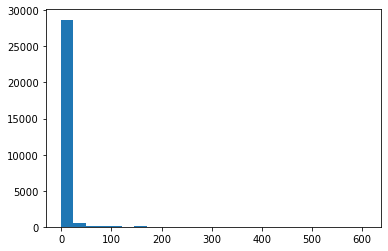

In [3]:
import matplotlib.pyplot as plt
import numpy as np
parcels_count = NIparcels.size().getInfo()
print('parcels total',parcels_count)
parcel_acreage = NIparcels.aggregate_array('ll_gisacre').getInfo()
# mean = np.mean(parcel_acreage)
# print('parcel acreage mean',mean)
plt.hist(parcel_acreage,25,align='mid')
plt.axis('tight')
plt.show()

In [ ]:
rng = np.random.default_rng(9995) # set seed of random number generator
mu, sigma = 0., 3.65 # mean and standard deviation - dial these
s = rng.normal(mu, sigma, parcels_count)

import matplotlib.pyplot as plt

plt.hist(s, 25, align='mid')
plt.axis('tight')
plt.show()


In [ ]:
# convert the samples drawn from above parameterized lognormal distro to PDF values
count, bins, ignored = plt.hist(s, 25, density=True, align='mid')
x = np.linspace(min(bins), max(bins), parcels_count)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
       / (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()

# print(count)
# print(min(bins))
# print(max(bins))

print(min(pdf)) # floats in pdf are in range [0,1)
print(max(pdf))
print(pdf[0:20])